## Practical Assignment 6

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5e6DTTnNK3e2SK78RGsyqBRhu-0GD0hdigyQkdFA8U_2J9TRDkzPQ
Mounted at /content/drive


### Importing Libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading and Understanding the data

In [7]:
df=pd.read_csv('/content/drive/My Drive/datasets/car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# Renaming Columns
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for col in col_names:
  print(df[col].value_counts())

med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64
2        432
5more    432
3        432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


* class is target variable

In [13]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [14]:
# Checking for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Spliting the dataset

In [20]:
X=df.drop(['class'], axis=1)
y=df['class']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.33, random_state=42)

In [23]:
X_train.shape , X_test.shape

((1157, 6), (571, 6))

### Feature Engineering

In [24]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [28]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [30]:
# Variables are of ordinal 
#data types so encoding the variables with ordinal encoding

import category_encoders as encode

encoder=encode.OrdinalEncoder(cols=X_train.columns)

X_train=encoder.fit_transform(X_train)
X_test= encoder.transform(X_test)


In [32]:
X_train.head(), X_test.head()

(      buying  maint  doors  persons  lug_boot  safety
 48         1      1      1        1         1       1
 468        2      1      1        2         2       1
 155        1      2      1        1         2       2
 1721       3      3      2        1         2       2
 1208       4      3      3        1         2       2,
       buying  maint  doors  persons  lug_boot  safety
 599        2      2      4        3         1       2
 1201       4      3      3        2         1       3
 628        2      2      2        3         3       3
 1498       3      2      2        2         1       3
 1263       4      3      4        1         1       1)

### Applying Decision Tree Classifier
 Criteria- (gini index)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [37]:
prediction=model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print("Model accuracy score is : ", accuracy_score(y_test, prediction) )

Model accuracy score is :  0.8021015761821366


In [39]:
predict_train=model.predict(X_train)
print("Model accuracy score for training set is : ", accuracy_score(y_train, predict_train) )

Model accuracy score for training set is :  0.7865168539325843


There is no sign of overfitting or underfitting as our training and test set accuracy are quite comparable

### Visualizing decision trees with graphviz

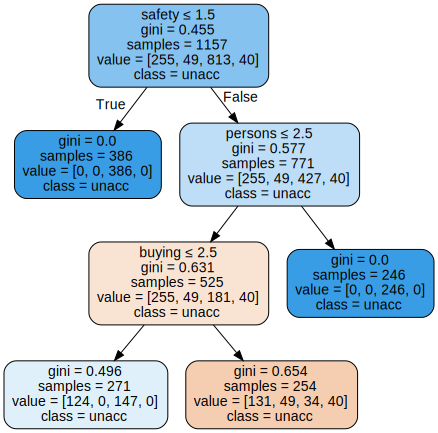

In [43]:
import graphviz
from sklearn import tree
data = tree.export_graphviz(model, out_file=None, feature_names=X_train.columns
                           ,class_names=y_train,
                           filled=True, rounded=True,
                           special_characters=True)

graph=graphviz.Source(data)
graph

### Decision tree classifier with criterion entropy

In [45]:
model2 =DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Model accuracy score with criterion entropy: ', accuracy_score(y_test, y_pred))

Model accuracy score with criterion entropy:  0.8021015761821366


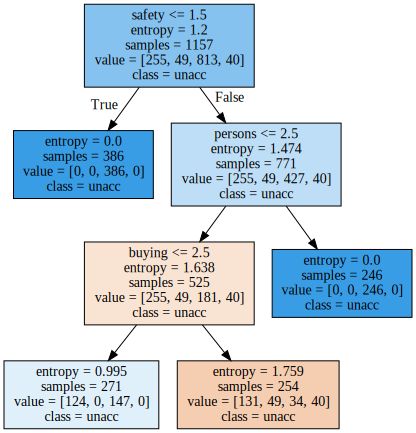

In [49]:
dot_data=tree.export_graphviz(model2 ,filled=True, feature_names=X_train.columns, class_names=y_train)

graph=graphviz.Source(dot_data)
graph

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, prediction)
print("Confusion matrix\n\n", matrix)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


### Classification Report

In [51]:
# Displaying precision, recallm f1_score, support
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571

